In [1]:

import os
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO  # Ensure you have `pip install ultralytics`
import random


# --- CONFIG ---
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {DEVICE}") 
BASE_DATA_ROOT = "../soccernet_data/tracking"
GT_FILENAME = "gt.txt"
IMAGE_FOLDER = "img1"
IMAGE_EXTS = ['.jpg', '.png']
NUM_VISUALS = 10
SCORE_THRESH = 0.8
IOU_THRESH = 0.5
SAMPLE_PER_SEQ = 30

Using device: mps


Using device: mps
Processing sequences...


Sequences:   0%|          | 0/106 [00:00<?, ?it/s]


WARNING ⚠️ NMS time limit 2.050s exceeded
0: 384x640 20 players, 2 referees, 451.6ms
Speed: 72.1ms preprocess, 451.6ms inference, 5076.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 480.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 2 referees, 17.6ms
Speed: 2.2ms preprocess, 17.6ms inference, 957.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 16.2ms
Speed: 2.8ms preprocess, 16.2ms inference, 62.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.9ms
Speed: 2.6ms preprocess, 16.9ms inference, 92.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 2 referees, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 55.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 15.7ms
Speed: 2.5ms preprocess, 15.7ms inference, 55.8ms

Sequences:   1%|          | 1/106 [00:23<41:24, 23.66s/it]


0: 384x640 1 goalkeeper, 15 players, 1 referee, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 48.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 17.8ms
Speed: 2.2ms preprocess, 17.8ms inference, 49.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 46.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 30.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 15.8ms
Speed: 2.2ms preprocess, 15.8ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 474.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 45.1ms postprocess per image at shape (1, 3, 384, 64

Sequences:   2%|▏         | 2/106 [00:31<25:11, 14.54s/it]


0: 384x640 15 players, 37.4ms
Speed: 2.6ms preprocess, 37.4ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 16.2ms
Speed: 2.7ms preprocess, 16.2ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 53.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 1 referee, 21.0ms
Speed: 3.8ms preprocess, 21.0ms inference, 54.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 70.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 18.0ms
Speed: 3.8ms preprocess, 18.0ms inference, 54.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 55.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 16.4ms
Speed: 2.0ms prep

Sequences:   3%|▎         | 3/106 [00:39<19:28, 11.35s/it]


0: 384x640 15 players, 1 referee, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 18.5ms
Speed: 2.3ms preprocess, 18.5ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 53.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 19.1ms
Speed: 2.5ms preprocess, 19.1ms inference, 79.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 61.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 18.3ms
Sp

Sequences:   4%|▍         | 4/106 [00:45<15:57,  9.39s/it]


0: 384x640 24 players, 1 referee, 32.8ms
Speed: 2.6ms preprocess, 32.8ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 16.5ms
Speed: 2.2ms preprocess, 16.5ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 52.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.2ms
Speed: 2.4ms preprocess, 15.2ms inference, 50.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 52.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 3 referees, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 55.1ms postprocess per image at shape (1, 3, 384, 640)

0

Sequences:   5%|▍         | 5/106 [00:52<14:29,  8.61s/it]


0: 384x640 24 players, 1 referee, 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 62.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 15.8ms
Speed: 2.2ms preprocess, 15.8ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 17.7ms
Speed: 2.4ms preprocess, 17.7ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 2 referees, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 55.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 referees, 16.0ms
Speed: 2.4ms preprocess, 16.0ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.6ms
Speed: 2.4ms preprocess, 16.6ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 r

Sequences:   6%|▌         | 6/106 [00:59<13:19,  7.99s/it]


0: 384x640 22 players, 1 referee, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.8ms
Speed: 2.4ms preprocess, 16.8ms inference, 69.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 1 referee, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 46.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee,

Sequences:   7%|▋         | 7/106 [01:07<12:54,  7.83s/it]


0: 384x640 21 players, 1 referee, 33.3ms
Speed: 2.6ms preprocess, 33.3ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 1 referee, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 67.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 17.5ms
Speed: 2.1ms preprocess, 17.5ms inference, 35.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 68.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 64.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 70.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 15.1ms
Speed: 2

Sequences:   8%|▊         | 8/106 [01:14<12:24,  7.60s/it]


0: 384x640 1 goalkeeper, 18 players, 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 16.6ms
Speed: 2.2ms preprocess, 16.6ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 12.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 16.5ms
Speed: 2.2ms preprocess, 16.5ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 73.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalk

Sequences:   8%|▊         | 9/106 [01:20<11:28,  7.09s/it]


0: 384x640 16 players, 3 referees, 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 16.7ms
Speed: 3.4ms preprocess, 16.7ms inference, 85.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 17.4ms
Speed: 2.2ms preprocess, 17.4ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 17.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 75.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 p

Sequences:   9%|▉         | 10/106 [01:26<10:46,  6.74s/it]


0: 384x640 16 players, 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 22.4ms
Speed: 10.7ms preprocess, 22.4ms inference, 21.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 71.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 15.5ms
Speed: 2.7ms preprocess, 15.5ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 16.0ms
Speed: 2.2ms preprocess, 16.0ms in

Sequences:  10%|█         | 11/106 [01:31<09:58,  6.29s/it]


0: 384x640 28 players, 32.8ms
Speed: 2.3ms preprocess, 32.8ms inference, 73.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 42 players, 1 referee, 19.0ms
Speed: 2.3ms preprocess, 19.0ms inference, 44.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 69.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 69.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 2 referees, 15.9ms
Speed: 1.9ms preprocess, 15.9

Sequences:  11%|█▏        | 12/106 [01:39<10:36,  6.78s/it]


0: 384x640 17 players, 1 referee, 125.6ms
Speed: 3.2ms preprocess, 125.6ms inference, 50.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 16.7ms
Speed: 1.9ms preprocess, 16.7ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 2 referees, 17.2ms
Speed: 2.3ms preprocess, 17.2ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 17.1ms
Speed: 2.3ms preprocess, 17.1ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1

Sequences:  12%|█▏        | 13/106 [01:44<09:52,  6.37s/it]


0: 384x640 1 goalkeeper, 13 players, 33.0ms
Speed: 3.0ms preprocess, 33.0ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 16.4ms
Speed: 2.2ms preprocess, 16.4ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 16.6ms
Speed: 2.5ms preprocess, 16.6ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 2 referees, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 1 referee, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 3 referees, 15.5ms
Speed: 1.7ms preprocess, 15.5ms inference, 13.5ms postprocess per image at s

Sequences:  13%|█▎        | 14/106 [01:50<09:32,  6.22s/it]


0: 384x640 19 players, 1 referee, 90.0ms
Speed: 2.7ms preprocess, 90.0ms inference, 77.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 16.5ms
Speed: 3.1ms preprocess, 16.5ms inference, 9.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 15.3ms
Speed: 2.1ms preprocess, 15.3ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players

Sequences:  14%|█▍        | 15/106 [01:57<09:39,  6.37s/it]


0: 384x640 18 players, 1 referee, 33.5ms
Speed: 2.4ms preprocess, 33.5ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 17.8ms
Speed: 2.7ms preprocess, 17.8ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 17.7ms
Speed: 2.3ms preprocess, 17.7ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 18.3ms
Speed: 2.7ms preprocess, 18.3ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 17.0ms
Speed: 1.9ms pre

Sequences:  15%|█▌        | 16/106 [02:04<09:42,  6.47s/it]


0: 384x640 26 players, 1 referee, 35.6ms
Speed: 3.2ms preprocess, 35.6ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 18.9ms
Speed: 2.5ms preprocess, 18.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 3 referees, 16.1ms
Speed: 2.4ms preprocess, 16.1ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 15.7ms
Speed: 2.9ms preprocess, 15.7ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 2 referees, 17.5ms
Speed: 3.1ms preprocess, 17.5ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 4 referees, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)



Sequences:  16%|█▌        | 17/106 [02:12<10:20,  6.97s/it]


0: 384x640 36 players, 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 2 referees, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 2 referees, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 20.5ms postp

Sequences:  17%|█▋        | 18/106 [02:18<09:53,  6.74s/it]


0: 384x640 12 players, 33.6ms
Speed: 2.6ms preprocess, 33.6ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 16.9ms
Speed: 2.1ms preprocess, 16.9ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 2 referees, 16.6ms
Speed: 2.3ms preprocess, 16.6ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 19.6ms
Speed: 2.4ms preprocess, 19.6ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 17.2ms
Speed: 2.0ms preprocess, 17.2ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 1 referee, 16.9ms
Speed: 2.3ms preprocess, 16.9ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 17.8ms
Speed: 2.1ms preproces

Sequences:  18%|█▊        | 19/106 [02:23<09:13,  6.36s/it]


0: 384x640 24 players, 1 referee, 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 7 players, 15.7ms
Speed: 2.4ms preprocess, 15.7ms inference, 86.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 7 players, 2 referees, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 3

Sequences:  19%|█▉        | 20/106 [02:29<08:45,  6.11s/it]


0: 384x640 13 players, 1 referee, 34.1ms
Speed: 2.3ms preprocess, 34.1ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 17.3ms
Speed: 2.4ms preprocess, 17.3ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 17.3ms
Speed: 2.3ms preprocess, 17.3ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 15.3m

Sequences:  20%|█▉        | 21/106 [02:34<08:21,  5.90s/it]


0: 384x640 28 players, 1 referee, 32.9ms
Speed: 2.3ms preprocess, 32.9ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 15.8ms
Speed: 2.2ms preprocess, 15.8ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 16.6ms
Speed: 2.3ms preprocess, 16.6ms inference, 12.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 16.2ms
Speed: 2.0ms preprocess, 16.2ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 17.3ms
Speed: 2.6ms preprocess, 17.3ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 17.9ms
Speed: 1.9ms preprocess

Sequences:  21%|██        | 22/106 [02:40<08:03,  5.76s/it]


0: 384x640 21 players, 1 referee, 33.4ms
Speed: 3.5ms preprocess, 33.4ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 18.8ms
Speed: 2.0ms preprocess, 18.8ms inference, 18.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 15.4ms
Speed: 2.3ms preprocess, 15.4ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 16.1ms
Speed: 2.6ms preprocess, 16.1ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 referee, 15.0ms
Sp

Sequences:  22%|██▏       | 23/106 [02:44<07:27,  5.39s/it]


0: 384x640 10 players, 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 18.8ms
Speed: 2.1ms preprocess, 18.8ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 16.4ms
Speed: 2.2ms preprocess, 16.4ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 1 referee, 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4 referees, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 1 referee, 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 64

Sequences:  23%|██▎       | 24/106 [02:50<07:21,  5.39s/it]


0: 384x640 24 players, 75.5ms
Speed: 1.8ms preprocess, 75.5ms inference, 90.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 16.2ms
Speed: 2.5ms preprocess, 16.2ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 2 referees, 15.5ms
Speed: 2.3ms preprocess, 15.5ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 28 players, 16.2ms
Speed: 1.9ms prepr

Sequences:  24%|██▎       | 25/106 [02:56<07:40,  5.68s/it]


0: 384x640 9 players, 39.2ms
Speed: 2.0ms preprocess, 39.2ms inference, 28.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 15.8ms
Speed: 2.7ms preprocess, 15.8ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.1ms
Speed: 2.3ms preprocess, 16.1ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 17.7ms
Speed: 2.4ms preprocess, 17.7ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 16.5ms
Speed:

Sequences:  25%|██▍       | 26/106 [03:03<07:57,  5.97s/it]


0: 384x640 37 players, 34.0ms
Speed: 2.4ms preprocess, 34.0ms inference, 47.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 18.0ms
Speed: 2.6ms preprocess, 18.0ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 17.8ms
Speed: 2.1ms preprocess, 17.8ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 16.8ms
Speed: 2.1ms preprocess, 16.8ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 players, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 15.1ms
Speed: 2.3ms preprocess, 15.1ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 15.5ms
Speed: 2.2ms preprocess, 

Sequences:  25%|██▌       | 27/106 [03:08<07:42,  5.85s/it]


0: 384x640 20 players, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 75.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 18.2ms
Speed: 2.6ms preprocess, 18.2ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 18.6ms
Speed: 2.3ms preprocess, 18.6ms inference, 78.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 83.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 16.3ms
Speed: 2.3ms preprocess, 16.3ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 16.7ms
Speed: 2.1ms

Sequences:  26%|██▋       | 28/106 [03:14<07:38,  5.88s/it]


0: 384x640 9 players, 32.7ms
Speed: 2.2ms preprocess, 32.7ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 15.5ms
Speed: 2.3ms preprocess, 15.5ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.6ms
Speed: 2.6ms preprocess, 15.6ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 16.1ms
Speed: 2.3ms preprocess, 16.1ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 14.9ms
Speed: 2.4ms preprocess, 14.9ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 referee, 16.1ms
Speed: 2.1ms preprocess, 16.1ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 1 referee, 25.5ms
Speed: 4.1ms preprocess

Sequences:  27%|██▋       | 29/106 [03:19<07:12,  5.62s/it]


0: 384x640 24 players, 32.4ms
Speed: 2.2ms preprocess, 32.4ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 17.4ms
Speed: 2.1ms preprocess, 17.4ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 1 referee, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 3 referees, 17.3ms
Speed: 2.2ms preprocess, 17.3ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 137.7ms
Speed: 2.3ms preprocess, 137.7ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.1ms
Speed: 2.

Sequences:  28%|██▊       | 30/106 [03:25<07:06,  5.61s/it]


0: 384x640 1 goalkeeper, 23 players, 1 referee, 32.3ms
Speed: 2.4ms preprocess, 32.3ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 1 referee, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 2 referees, 15.4ms
Speed: 2.3ms preprocess, 15.4ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 12.5ms postprocess per image at shape (1, 3

Sequences:  29%|██▉       | 31/106 [03:30<06:56,  5.56s/it]


0: 384x640 20 players, 88.3ms
Speed: 2.5ms preprocess, 88.3ms inference, 50.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 18.4ms
Speed: 2.0ms preprocess, 18.4ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 17.8ms
Speed: 2.2ms preprocess, 17.8ms inference, 19.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 19.2ms
Speed: 2.1ms preprocess, 19.2ms inference, 18.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 17.8ms
Speed: 2.5ms preprocess, 17.8ms inference, 16.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 16.9ms
Speed: 8.7ms preprocess, 16.9ms inference, 12.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 18.3ms
Speed: 2.8ms preprocess, 18.3ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 18.9ms
Speed: 2.4ms preproce

Sequences:  30%|███       | 32/106 [03:36<07:04,  5.74s/it]


0: 384x640 1 goalkeeper, 22 players, 33.4ms
Speed: 2.5ms preprocess, 33.4ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.9ms
Speed: 2.6ms preprocess, 15.9ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 16.5ms
Speed: 2.5ms preprocess, 16.5ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 17.4ms
Speed: 2.4ms preprocess, 17.4ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 1 referee, 16.6ms
Speed:

Sequences:  31%|███       | 33/106 [03:42<06:43,  5.52s/it]


0: 384x640 14 players, 1 referee, 161.9ms
Speed: 2.9ms preprocess, 161.9ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 14.9ms
Speed: 2.1ms preprocess, 14.9ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3 referees, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 16.9ms
Speed: 2.2ms preprocess, 16.9ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 r

Sequences:  32%|███▏      | 34/106 [03:47<06:32,  5.45s/it]


0: 384x640 1 goalkeeper, 22 players, 1 referee, 33.4ms
Speed: 2.5ms preprocess, 33.4ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 3 referees, 17.7ms
Speed: 2.2ms preprocess, 17.7ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 16.7ms
Speed: 2.6ms preprocess, 16.7ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 

Sequences:  33%|███▎      | 35/106 [03:53<06:34,  5.55s/it]


0: 384x640 14 players, 1 referee, 77.5ms
Speed: 3.1ms preprocess, 77.5ms inference, 38.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 15.4ms
Speed: 2.7ms preprocess, 15.4ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 12.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 16.2ms
Speed: 2.5ms preprocess, 16.2ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 14.9ms
Speed: 2.2ms preprocess, 14.9ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 2 referees, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0

Sequences:  34%|███▍      | 36/106 [03:57<06:14,  5.35s/it]


0: 384x640 19 players, 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 18.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 17.7ms
Speed: 2.3ms preprocess, 17.7ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 18.3ms
Speed: 2.0ms preprocess, 18.3ms inference, 18.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 18.7ms
Speed: 2.0ms preprocess, 18.7ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 18.8ms
Speed: 2.3ms preprocess, 18.8ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 17.3ms
Speed: 2.5ms preprocess, 17.3ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 17.6ms
Speed: 2.2ms preprocess, 17.6ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 16.8ms
Speed: 2.6ms preproces

Sequences:  35%|███▍      | 37/106 [04:03<06:18,  5.48s/it]


0: 384x640 14 players, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 1 referee, 48.2ms
Speed: 2.9ms preprocess, 48.2ms inference, 18.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 18.2ms
Speed: 2.3ms preprocess, 18.2ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 15.0ms
Speed: 2.2ms preprocess, 15.0ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 1 referee, 16.8ms
Speed: 2.4ms preprocess, 16.8ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 17.5ms
Speed: 2.2ms preprocess, 17.5ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 2 referees, 18.1ms
Speed: 2.2ms preprocess, 18.1ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 1 referee, 18.5ms
Speed: 2.4ms

Sequences:  36%|███▌      | 38/106 [04:09<06:09,  5.44s/it]


0: 384x640 1 goalkeeper, 29 players, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 28 players, 18.7ms
Speed: 2.2ms preprocess, 18.7ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 16.3ms
Speed: 2.8ms preprocess, 16.3ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 15.8ms
Speed: 2.4ms preprocess, 15.8ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 15.8ms
Speed: 2.5ms preprocess, 15.8ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 16.2ms
Speed: 2.5ms preprocess, 16.2ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 19.5ms
Speed: 2.8ms preprocess, 19.5ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 playe

Sequences:  37%|███▋      | 39/106 [04:15<06:22,  5.71s/it]


0: 384x640 15 players, 1 referee, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.8ms
Speed: 2.2ms preprocess, 15.8ms inference, 16.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 1 referee, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 16.9ms
Speed: 2.7ms preprocess, 16.9ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 16.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3 referees, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 17.7ms
Speed: 2.1ms preproces

Sequences:  38%|███▊      | 40/106 [04:20<06:13,  5.66s/it]


0: 384x640 27 players, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 18.7ms
Speed: 2.3ms preprocess, 18.7ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 27 players, 1 referee, 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 83.0ms
Speed: 21.1ms preprocess, 83.0ms inference, 24.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 18.6ms
Speed: 2.5ms preprocess, 18.6ms inference, 38.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 

Sequences:  39%|███▊      | 41/106 [04:26<06:12,  5.73s/it]


0: 384x640 1 goalkeeper, 20 players, 2 referees, 36.0ms
Speed: 2.3ms preprocess, 36.0ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 15.3ms
Speed: 2.1ms preprocess, 15.3ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 17.3ms
Speed: 2.1ms preprocess, 17.3ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 17.0ms
Speed: 4.1ms preprocess, 17.0ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 18.5ms
Speed: 2.3ms preprocess, 18.5ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 

Sequences:  40%|███▉      | 42/106 [04:31<05:54,  5.54s/it]


0: 384x640 22 players, 1 referee, 138.3ms
Speed: 2.2ms preprocess, 138.3ms inference, 41.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 15.8ms
Speed: 2.2ms preprocess, 15.8ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 16.8ms
Speed: 2.1ms preprocess, 16.8ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 45.2ms
Speed: 2.1ms preprocess, 45.2ms inference, 20.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 15.5ms
Speed: 2.1ms preprocess, 15.5ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 3 referees, 17.1ms
Speed: 2.5ms preprocess, 17.1ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 19.2ms
Speed: 2.1ms prepro

Sequences:  41%|████      | 43/106 [04:37<05:48,  5.53s/it]


0: 384x640 22 players, 1 referee, 35.9ms
Speed: 3.2ms preprocess, 35.9ms inference, 18.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 18.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 19.6ms
Speed: 2.2ms preprocess, 19.6ms inference, 33.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.3ms
Speed: 2.1m

Sequences:  42%|████▏     | 44/106 [04:42<05:29,  5.32s/it]


0: 384x640 19 players, 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 22.8ms
Speed: 2.4ms preprocess, 22.8ms inference, 37.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 18.0ms
Speed: 2.7ms preprocess, 18.0ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 2 referees, 16.3ms
Speed: 2.4ms preprocess, 16.3ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 17.1ms
Speed: 2.1ms preprocess, 17.1ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.6ms
Speed: 2.

Sequences:  42%|████▏     | 45/106 [04:47<05:19,  5.23s/it]


0: 384x640 19 players, 1 referee, 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 18.3ms
Speed: 2.1ms preprocess, 18.3ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 2 referees, 18.3ms
Speed: 2.2ms preprocess, 18.3ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 18.5ms
Speed: 3.0ms preprocess, 18.5ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 17.6ms
Speed: 2.2ms preprocess, 17.6ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 3 referees, 16.1ms
Speed: 1.7ms preprocess, 16.1ms i

Sequences:  43%|████▎     | 46/106 [04:52<05:20,  5.35s/it]


0: 384x640 13 players, 1 referee, 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 16.1ms
Speed: 2.2ms preprocess, 16.1ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 16.2ms
Speed: 2.3ms preprocess, 16.2ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 14.9ms
Speed: 2.1ms preprocess, 14.9ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.4m

Sequences:  44%|████▍     | 47/106 [04:57<05:05,  5.17s/it]


0: 384x640 16 players, 1 referee, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 15.3ms
Speed: 2.0ms preprocess, 15.3ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3 referees, 15.2ms
Speed: 2.3ms preprocess, 15.2ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 15.4ms
Speed: 2.2ms preprocess, 15.4m

Sequences:  45%|████▌     | 48/106 [05:02<04:52,  5.05s/it]


0: 384x640 30 players, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 16.5ms
Speed: 3.4ms preprocess, 16.5ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 17.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 17.0ms
Speed: 2.9ms preprocess, 17.0ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 20.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 31 players, 2 referees, 17.7ms
Speed: 2.4ms preprocess, 17.7ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 19.3ms
Speed: 2.

Sequences:  46%|████▌     | 49/106 [05:08<05:08,  5.41s/it]


0: 384x640 14 players, 31.9ms
Speed: 2.4ms preprocess, 31.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 15.7ms
Speed: 2.4ms preprocess, 15.7ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 51.2ms
Speed: 1.9ms preprocess, 51.2ms inference, 18.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 1 referee, 16.9ms
Speed: 2.7ms preprocess, 16.9ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 10 players, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 pla

Sequences:  47%|████▋     | 50/106 [05:13<04:55,  5.28s/it]


0: 384x640 16 players, 34.6ms
Speed: 2.5ms preprocess, 34.6ms inference, 10.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 19.7ms
Speed: 2.3ms preprocess, 19.7ms inference, 17.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 15.8ms
Speed: 2.2ms preprocess, 15.8ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 17.0ms
Speed: 2.6

Sequences:  48%|████▊     | 51/106 [05:19<05:04,  5.53s/it]


0: 384x640 10 players, 1 referee, 42.8ms
Speed: 2.6ms preprocess, 42.8ms inference, 18.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 18.3ms
Speed: 2.8ms preprocess, 18.3ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 16.4ms
Speed: 2.2ms preprocess, 16.4ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 17.7ms
Speed: 2.2ms preprocess, 17.7ms inference, 16.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 17.2ms
Speed: 2.4ms preprocess, 17.2ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 19.6ms
Speed: 2.4ms preprocess, 19.6ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 18.9ms
Speed: 2.2ms preprocess, 18.9ms inference, 58.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 19.0ms
Speed: 2.5ms preproce

Sequences:  49%|████▉     | 52/106 [05:25<05:00,  5.56s/it]


0: 384x640 19 players, 2 referees, 102.3ms
Speed: 2.3ms preprocess, 102.3ms inference, 104.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.1ms
Speed: 2.2ms preprocess, 15.1ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.2ms
Speed: 2.3ms preprocess, 15.2ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 

Sequences:  50%|█████     | 53/106 [05:31<04:55,  5.58s/it]


0: 384x640 23 players, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 2 referees, 17.9ms
Speed: 2.4ms preprocess, 17.9ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 18.1ms
Speed: 2.2ms preprocess, 18.1ms inference, 17.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 players, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 18.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 23.8ms
Speed: 2.1ms preprocess, 23.8ms inference, 18.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 16.5ms
Speed: 2.1ms preprocess, 16.5ms i

Sequences:  51%|█████     | 54/106 [05:36<04:47,  5.53s/it]


0: 384x640 25 players, 2 referees, 37.4ms
Speed: 2.4ms preprocess, 37.4ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3 referees, 17.5ms
Speed: 3.1ms preprocess, 17.5ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 2 referees, 18.2ms
Speed: 2.1ms preprocess, 18.2ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 16.5ms
Speed: 2.3ms preprocess, 16.5ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 18.3ms
Speed: 2.3ms preprocess, 18.3ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 23.3ms
Speed: 12.1ms preprocess, 23.3ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 pl

Sequences:  52%|█████▏    | 55/106 [05:42<04:48,  5.66s/it]


0: 384x640 23 players, 38.5ms
Speed: 2.6ms preprocess, 38.5ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 17.2ms
Speed: 2.3ms preprocess, 17.2ms inference, 16.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 15.7ms
Speed: 2.5ms preprocess, 15.7ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 17.0ms
Speed: 2.6ms preprocess, 17.0ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 10 players, 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 16.1ms
Speed: 2.4ms preprocess, 16.1ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 17.8ms
Speed: 2.5ms preprocess, 17.8ms inference, 17.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 16.7ms
Speed

Sequences:  53%|█████▎    | 56/106 [05:48<04:42,  5.65s/it]


0: 384x640 27 players, 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 18.2ms
Speed: 4.8ms preprocess, 18.2ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 1 referee, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 16.4ms
Speed: 2.2ms preprocess, 16.4ms in

Sequences:  54%|█████▍    | 57/106 [05:53<04:35,  5.63s/it]


0: 384x640 18 players, 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 36.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 22.2ms postpro

Sequences:  55%|█████▍    | 58/106 [05:58<04:23,  5.48s/it]


0: 384x640 6 players, 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 21.0ms
Speed: 2.3ms preprocess, 21.0ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 17.7ms
Speed: 2.3ms preprocess, 17.7ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 18.1ms
Speed: 2.1ms preprocess, 18.1ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 16.2ms
Speed: 2.7ms preprocess, 16.2ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 16.2ms
Speed: 2.1ms preprocess, 16.2ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 17.3ms
Sp

Sequences:  56%|█████▌    | 59/106 [06:03<04:05,  5.22s/it]


0: 384x640 14 players, 2 referees, 44.8ms
Speed: 2.4ms preprocess, 44.8ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 1 referee, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 17.2ms
Speed: 2.4ms preprocess, 17.2ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 16.5ms
Speed: 2.2ms preprocess, 16.5ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 16.8ms
Speed: 2.2ms preprocess, 16.8ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 53.4ms
Speed: 2.1ms preprocess, 53.4ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 14.9ms
Speed: 1.9ms preprocess, 14.9ms 

Sequences:  57%|█████▋    | 60/106 [06:08<04:03,  5.29s/it]


0: 384x640 13 players, 33.2ms
Speed: 2.8ms preprocess, 33.2ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 2 referees, 16.9ms
Speed: 3.5ms preprocess, 16.9ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 18.4ms
Speed: 2.3ms preprocess, 18.4ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 17.7ms
Speed: 2.1ms preprocess, 17.7ms inference, 17.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 15.6ms
Speed: 2.0ms preprocess, 15.6ms infe

Sequences:  58%|█████▊    | 61/106 [06:13<03:53,  5.18s/it]


0: 384x640 14 players, 1 referee, 42.6ms
Speed: 3.2ms preprocess, 42.6ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 18.1ms
Speed: 2.2ms preprocess, 18.1ms inference, 16.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 1 referee, 19.2ms
Speed: 2.5ms preprocess, 19.2ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 16.7ms
Speed: 2.2ms preprocess, 16.7ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 18.8ms
Speed: 2.5ms preprocess, 18.8ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 18.0ms
Speed: 2.3ms preprocess, 18.0ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 19.4ms
Speed: 2.

Sequences:  58%|█████▊    | 62/106 [06:19<03:50,  5.24s/it]


0: 384x640 1 goalkeeper, 23 players, 1 referee, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 17.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 21.3ms
Speed: 6.4ms preprocess, 21.3ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 15.2ms
Speed: 2.1ms preprocess, 15.2ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 2 referees, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 17.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 16.2ms
Speed:

Sequences:  59%|█████▉    | 63/106 [06:24<03:48,  5.31s/it]


0: 384x640 25 players, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 18.3ms
Speed: 2.0ms preprocess, 18.3ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 18.4ms
Speed: 2.3ms preprocess, 18.4ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 17.7ms
Speed: 2.2ms preprocess, 17.7ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 17.4ms
Speed: 2.1ms preprocess, 17.4ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 15.3ms
Speed: 2.4m

Sequences:  60%|██████    | 64/106 [06:29<03:38,  5.21s/it]


0: 384x640 17 players, 1 referee, 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 17.9ms
Speed: 2.0ms preprocess, 17.9ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 1 referee, 58.1ms
Speed: 2.3ms preprocess, 58.1ms inference, 20.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 16.6ms
Speed: 2.5ms preprocess, 16.6ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 10.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 re

Sequences:  61%|██████▏   | 65/106 [06:34<03:34,  5.23s/it]


0: 384x640 19 players, 1 referee, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 17.3ms
Speed: 2.5ms preprocess, 17.3ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 16.0ms
Speed: 2.1ms preprocess, 16.0ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 16.0ms
Speed: 2.5ms preprocess, 16.0ms inference, 17.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 

Sequences:  62%|██████▏   | 66/106 [06:39<03:23,  5.08s/it]


0: 384x640 4 players, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 60.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 18.3ms
Speed: 2.2ms preprocess, 18.3ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 17.5ms
Speed: 2.3ms preprocess, 17.5ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 51.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 17.4ms
Speed: 2.4ms preprocess, 17.4ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.3ms
Speed: 1.8ms

Sequences:  63%|██████▎   | 67/106 [06:44<03:17,  5.07s/it]


0: 384x640 9 players, 1 referee, 34.9ms
Speed: 2.3ms preprocess, 34.9ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 1 referee, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 12.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 16.2ms
Speed: 2.1ms preprocess, 16.2ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 24 players, 2 referees, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 13.0ms postprocess per image at s

Sequences:  64%|██████▍   | 68/106 [06:49<03:09,  4.99s/it]


0: 384x640 18 players, 2 referees, 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 20.3ms
Speed: 2.3ms preprocess, 20.3ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 19.5ms
Speed: 2.4ms preprocess, 19.5ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 4 referees, 18.6ms
Speed: 2.2ms preprocess, 18.6ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 16.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 3 referees, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 15.9ms
Speed: 

Sequences:  65%|██████▌   | 69/106 [06:55<03:15,  5.29s/it]


0: 384x640 22 players, 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 16.2ms
Speed: 2.0ms preprocess, 16.2ms inference, 16.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 16.5ms
Speed: 2.2ms preprocess, 16.5ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 18.4ms
Speed: 2.2ms preprocess, 18.4ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 18.0ms
Speed: 2.3ms preprocess, 18.0ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3 referees, 16.7ms
Speed: 1.9ms preprocess, 16.7ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 4 referees, 16.2ms
Speed: 2.6ms preprocess, 16.2ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 17.8

Sequences:  66%|██████▌   | 70/106 [07:01<03:22,  5.61s/it]


0: 384x640 24 players, 33.9ms
Speed: 2.5ms preprocess, 33.9ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 22.4ms
Speed: 4.2ms preprocess, 22.4ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.5ms
Speed: 2.1ms preprocess, 15.5ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 16.1ms
Speed: 4.8ms preprocess, 16.1ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 13.5ms postp

Sequences:  67%|██████▋   | 71/106 [07:07<03:12,  5.51s/it]


0: 384x640 25 players, 1 referee, 178.9ms
Speed: 3.2ms preprocess, 178.9ms inference, 19.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 16.4ms
Speed: 2.7ms preprocess, 16.4ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 17.5ms
Speed: 2.4ms preprocess, 17.5ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 10.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 1 referee, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 16.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 2 referees, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 players, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 15

Sequences:  68%|██████▊   | 72/106 [07:12<03:04,  5.43s/it]


0: 384x640 1 goalkeeper, 24 players, 1 referee, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 1 referee, 15.4ms
Speed: 2.4ms preprocess, 15.4ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 1 referee, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 1 referee, 15.9ms
Speed: 2.2ms preprocess, 15.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 15.4ms postproce

Sequences:  69%|██████▉   | 73/106 [07:18<03:03,  5.56s/it]


0: 384x640 1 goalkeeper, 15 players, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 17.6ms
Speed: 2.5ms preprocess, 17.6ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 18.6ms
Speed: 2.2ms preprocess, 18.6ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 17.2ms
Speed: 2.9ms preprocess, 17.2ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 17.1ms
Speed: 2.6ms preprocess, 17.1ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 17.6ms
Speed: 2.6ms preprocess, 17.6ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 15.0ms
Speed: 2.2ms prepr

Sequences:  70%|██████▉   | 74/106 [07:23<02:54,  5.45s/it]


0: 384x640 19 players, 1 referee, 31.9ms
Speed: 2.0ms preprocess, 31.9ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3 referees, 16.9ms
Speed: 2.2ms preprocess, 16.9ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 16.5ms
Speed: 2.3ms preprocess, 16.5ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 16.7ms
Speed: 2.5ms preprocess, 16.7ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 16.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 pla

Sequences:  71%|███████   | 75/106 [07:28<02:46,  5.38s/it]


0: 384x640 18 players, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 2 referees, 16.1ms
Speed: 2.9ms preprocess, 16.1ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 24.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 17.4ms
Speed: 2.1ms preprocess, 17.4ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inf

Sequences:  72%|███████▏  | 76/106 [07:33<02:36,  5.22s/it]


0: 384x640 28 players, 2 referees, 38.5ms
Speed: 12.8ms preprocess, 38.5ms inference, 10.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 17.4ms
Speed: 3.0ms preprocess, 17.4ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 17.3ms
Speed: 2.4ms preprocess, 17.3ms inference, 38.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 17.4ms
Speed: 2.5ms preprocess, 17.4ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 19.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 17.1ms
Speed: 1.

Sequences:  73%|███████▎  | 77/106 [07:38<02:32,  5.27s/it]


0: 384x640 16 players, 45.7ms
Speed: 3.4ms preprocess, 45.7ms inference, 18.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 19.3ms
Speed: 2.3ms preprocess, 19.3ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 19.0ms
Speed: 2.5ms preprocess, 19.0ms inference, 18.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 18.7ms
Speed: 2.1ms preprocess, 18.7ms inference, 16.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 17.2ms
Speed: 2.4ms preprocess, 17.2ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 16.0ms
Speed: 2.2ms preprocess, 16.0ms in

Sequences:  74%|███████▎  | 78/106 [07:44<02:33,  5.49s/it]


0: 384x640 21 players, 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 3 referees, 43.8ms
Speed: 15.8ms preprocess, 43.8ms inference, 22.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 15.1ms
Speed: 2.4ms preprocess, 15.1ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 17.1ms
Speed: 2.8ms preprocess, 17.1ms inference, 18.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 15.8ms
Speed: 2.4ms preprocess, 15.8ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 15.2ms
Speed: 1.8ms preproces

Sequences:  75%|███████▍  | 79/106 [07:50<02:25,  5.40s/it]


0: 384x640 18 players, 35.1ms
Speed: 2.6ms preprocess, 35.1ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 16.8ms
Speed: 2.7ms preprocess, 16.8ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.0ms
Speed: 2.1ms preprocess, 16.0ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 17.2ms
Speed: 2.3ms preprocess, 17.2ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 16.0ms
Speed: 2.4ms preprocess, 16.0ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 14.6ms
Speed: 2.9ms preprocess, 14.6ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 1 referee, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 15.7ms
Speed: 2.4ms preprocess

Sequences:  75%|███████▌  | 80/106 [07:55<02:20,  5.40s/it]


0: 384x640 11 players, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 19.8ms
Speed: 2.1ms preprocess, 19.8ms inference, 12.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 17.3ms
Speed: 2.2ms preprocess, 17.3ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 19.4ms
Speed: 3.0ms preprocess, 19.4ms inference, 9.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 21.3ms
Speed: 3.1ms preprocess, 21.3ms inference, 16.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 20.3ms
Speed: 2.0ms preprocess, 20.3ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 19.0ms
Speed: 2.3ms preprocess, 19.0ms inference, 18.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 18.8ms
Speed: 2.1ms preprocess, 18.8ms inference, 14.8ms post

Sequences:  76%|███████▋  | 81/106 [08:00<02:12,  5.31s/it]


0: 384x640 33 players, 36.9ms
Speed: 2.0ms preprocess, 36.9ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 16.7ms
Speed: 2.8ms preprocess, 16.7ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 17.7ms
Speed: 4.5ms preprocess, 17.7ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 16.3ms
Speed: 3.0ms preprocess, 16.3ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 20.0ms
Speed: 2.5ms preprocess, 20.0ms inference, 18.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 17.7ms
Speed: 2.2ms preprocess, 17.7ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 37.8ms
Speed: 14.8ms preprocess, 37.8ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 25.8ms
Speed: 2.8ms preprocess, 25.8ms 

Sequences:  77%|███████▋  | 82/106 [08:06<02:11,  5.49s/it]


0: 384x640 16 players, 34.9ms
Speed: 2.4ms preprocess, 34.9ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 17.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 24.7ms
Speed: 11.5ms preprocess, 24.7ms inference, 21.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 66.9ms
Speed: 2.0ms preprocess, 66.9ms inference, 1

Sequences:  78%|███████▊  | 83/106 [08:11<02:04,  5.43s/it]


0: 384x640 12 players, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 17.8ms
Speed: 2.1ms preprocess, 17.8ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 17.8ms
Speed: 2.2ms preprocess, 17.8ms inference, 68.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 19.4ms
Speed: 2.6ms preprocess, 19.4ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 19.7ms
Speed: 2.3ms preprocess, 19.7ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 19.5ms
Speed: 3.3ms preprocess, 19.5ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 17.6ms
Speed: 2.4ms preprocess, 17.6ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 3 players, 18.1ms
Speed: 2.7ms preprocess, 18.1ms i

Sequences:  79%|███████▉  | 84/106 [08:17<01:59,  5.43s/it]


0: 384x640 10 players, 36.0ms
Speed: 3.2ms preprocess, 36.0ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 17.5ms
Speed: 2.7ms preprocess, 17.5ms inference, 18.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 1 referee, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 25.1ms
Speed: 2.5ms preprocess, 25.1ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 18.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.2ms
Speed: 2.1ms preprocess, 

Sequences:  80%|████████  | 85/106 [08:21<01:46,  5.08s/it]


0: 384x640 22 players, 33.0ms
Speed: 2.6ms preprocess, 33.0ms inference, 36.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 1 referee, 54.1ms
Speed: 2.2ms preprocess, 54.1ms inference, 17.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3 referees, 16.2ms
Speed: 2.1ms preprocess, 16.2ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 16.6ms
Speed: 2.3ms preprocess, 16.6ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 1 referee, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3 referees, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 16.3ms
Speed:

Sequences:  81%|████████  | 86/106 [08:25<01:38,  4.92s/it]


0: 384x640 32 players, 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 2 referees, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 16.1ms
Speed: 2.1ms preprocess, 16.1ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 players, 1 referee, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 15.2ms
Speed:

Sequences:  82%|████████▏ | 87/106 [08:30<01:33,  4.91s/it]


0: 384x640 14 players, 32.7ms
Speed: 2.3ms preprocess, 32.7ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 16.1ms
Speed: 2.7ms preprocess, 16.1ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 16.4ms
Speed: 2.3ms preprocess, 16.4ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 2 referees, 15.9ms
Speed: 2.8ms preprocess, 15.9ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 15.4ms
Speed: 2.3ms preprocess, 15.4ms 

Sequences:  83%|████████▎ | 88/106 [08:34<01:23,  4.65s/it]


0: 384x640 6 players, 35.8ms
Speed: 3.0ms preprocess, 35.8ms inference, 64.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 16.6ms
Speed: 2.8ms preprocess, 16.6ms inference, 9.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 62.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 17.4ms
Speed: 2.1ms preprocess, 17.4ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 18.2ms
Speed: 2.4ms preprocess, 18.2ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 16.7ms
Speed: 2.5ms preprocess, 16.7ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.9ms
Speed: 1.9ms preprocess, 15.9m

Sequences:  84%|████████▍ | 89/106 [08:38<01:15,  4.44s/it]


0: 384x640 22 players, 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 16.3ms
Speed: 4.7ms preprocess, 16.3ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 16.0ms
Speed: 2.1ms preprocess, 16.0ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 17.9ms
Speed: 2.2ms preprocess, 17.9ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 17.7ms
Speed: 2.5ms preprocess, 17.7ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 17.5m

Sequences:  85%|████████▍ | 90/106 [08:43<01:13,  4.62s/it]


0: 384x640 19 players, 1 referee, 37.4ms
Speed: 2.3ms preprocess, 37.4ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.3ms
Speed: 2.2ms preprocess, 15.3ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 15.5ms
Speed: 2.3ms preprocess, 15.5ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 14.9ms
Speed: 2.1ms preprocess, 14.9ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 14.6ms
Speed: 2.0

Sequences:  86%|████████▌ | 91/106 [08:48<01:09,  4.61s/it]


0: 384x640 17 players, 1 referee, 165.4ms
Speed: 4.0ms preprocess, 165.4ms inference, 19.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 1 referee, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 16.4ms
Speed: 3.2ms preprocess, 16.4ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 17.6ms
Speed: 2.4ms preprocess, 17.6ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3 referees, 19.2ms
Speed: 2.3ms preprocess, 19.2ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 34.8ms
Speed: 6.9ms preprocess, 34.8ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 17.3ms
Speed: 2.3ms preprocess, 17.3ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 pla

Sequences:  87%|████████▋ | 92/106 [08:53<01:07,  4.80s/it]


0: 384x640 21 players, 1 referee, 39.5ms
Speed: 2.3ms preprocess, 39.5ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 18.5ms
Speed: 2.6ms preprocess, 18.5ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 21.6ms
Speed: 2.5ms preprocess, 21.6ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 64.2ms
Speed: 2.2ms preprocess, 64.2ms inference, 10.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 17.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 17.5ms
Speed: 2.3ms preprocess, 17.5ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 player

Sequences:  88%|████████▊ | 93/106 [08:59<01:06,  5.14s/it]


0: 384x640 25 players, 2 referees, 32.4ms
Speed: 2.6ms preprocess, 32.4ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 3 referees, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 14.7ms
Speed: 2.4ms preprocess, 14.7ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 15.0ms
Speed: 2.2ms preprocess, 15.0ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 p

Sequences:  89%|████████▊ | 94/106 [09:06<01:07,  5.65s/it]


0: 384x640 10 players, 1 referee, 35.5ms
Speed: 3.3ms preprocess, 35.5ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3 referees, 17.8ms
Speed: 2.2ms preprocess, 17.8ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 42.6ms
Speed: 2.8ms preprocess, 42.6ms inference, 18.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 p

Sequences:  90%|████████▉ | 95/106 [09:12<01:02,  5.69s/it]


0: 384x640 16 players, 1 referee, 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 16.8ms
Speed: 2.2ms preprocess, 16.8ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 referees, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 11.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 16.9ms
Speed: 2.3ms preprocess, 16.9ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 17.5ms
Speed: 2.0ms preprocess, 17.5ms inference, 17.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 17.4ms
Speed: 2.8ms preprocess, 17.4ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 refe

Sequences:  91%|█████████ | 96/106 [09:17<00:54,  5.42s/it]


0: 384x640 15 players, 1 referee, 52.7ms
Speed: 1.9ms preprocess, 52.7ms inference, 76.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 15.7ms
Speed: 2.8ms preprocess, 15.7ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 16.4ms
Speed: 2.7ms preprocess, 16.4ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 pla

Sequences:  92%|█████████▏| 97/106 [09:22<00:48,  5.43s/it]


0: 384x640 1 goalkeeper, 9 players, 1 referee, 32.6ms
Speed: 1.8ms preprocess, 32.6ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 15.4ms
Speed: 2.5ms preprocess, 15.4ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3 referees, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 11.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 2 referees, 16.2ms
Speed: 2.1ms preprocess, 16.2ms inference, 12.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 14.6ms
Speed: 2.3ms preprocess, 14.6ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 13.9ms postproces

Sequences:  92%|█████████▏| 98/106 [09:27<00:42,  5.27s/it]


0: 384x640 25 players, 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 1 referee, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 2 referees, 15.5

Sequences:  93%|█████████▎| 99/106 [09:32<00:36,  5.19s/it]


0: 384x640 20 players, 2 referees, 41.9ms
Speed: 2.2ms preprocess, 41.9ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)

0

Sequences:  94%|█████████▍| 100/106 [09:38<00:32,  5.39s/it]


0: 384x640 20 players, 2 referees, 39.6ms
Speed: 1.9ms preprocess, 39.6ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 2 referees, 20.3ms
Speed: 2.7ms preprocess, 20.3ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 56.6ms
Speed: 2.1ms preprocess, 56.6ms inference, 17.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 13.8ms postprocess per imag

Sequences:  95%|█████████▌| 101/106 [09:43<00:27,  5.42s/it]


0: 384x640 11 players, 1 referee, 34.2ms
Speed: 2.4ms preprocess, 34.2ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 1 referee, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 18.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 1 referee, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 5 players, 1 referee, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 goalkeepers, 12 players, 2 referees, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 15.7ms
Speed: 2.4ms preprocess, 15.7ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 1 referee, 14.3ms
Speed: 2.1ms preprocess, 14.3ms inference, 14.7ms postprocess per image at shap

Sequences:  96%|█████████▌| 102/106 [09:48<00:20,  5.24s/it]


0: 384x640 18 players, 2 referees, 32.3ms
Speed: 2.3ms preprocess, 32.3ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 15.5ms
Speed: 2.1ms preprocess, 15.5ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 4 referees, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 2 referees, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 12.7ms postprocess per image 

Sequences:  97%|█████████▋| 103/106 [09:53<00:15,  5.25s/it]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 31.4ms
Speed: 2.0ms preprocess, 31.4ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 1 referee, 16.6ms
Speed: 2.2ms preprocess, 16.6ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 14.9ms
Speed: 2.8ms preprocess, 14.9ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 1 referee, 18.6ms
Speed: 2.8ms preprocess, 18.6ms inference, 13.1ms postprocess per image at shape (1, 3

Sequences:  98%|█████████▊| 104/106 [09:59<00:10,  5.30s/it]


0: 384x640 26 players, 2 referees, 32.0ms
Speed: 2.3ms preprocess, 32.0ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 24 players, 1 referee, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 1 referee, 40.3ms
Speed: 2.2ms preprocess, 40.3ms inference, 32.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 15.6ms
Speed: 2.6ms preprocess, 15.6ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 14

Sequences:  99%|█████████▉| 105/106 [10:04<00:05,  5.26s/it]


0: 384x640 15 players, 1 referee, 31.4ms
Speed: 2.6ms preprocess, 31.4ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 1 referee, 14.9ms
Speed: 2.8ms preprocess, 14.9ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 1 referee, 16.2ms
Speed: 2.8ms preprocess, 16.2ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 17.5ms
Speed: 2.1ms preprocess, 17.5ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 15.1ms
Speed: 2.2ms preprocess, 15.1ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 14.9ms
Speed: 2.1ms preprocess, 14.9ms inference, 8.4ms postprocess per image at sha

Sequences: 100%|██████████| 106/106 [10:09<00:00,  5.75s/it]


Average Detection Accuracy over 3180 frames: 94.06%
Precision: 0.949, Recall: 0.543


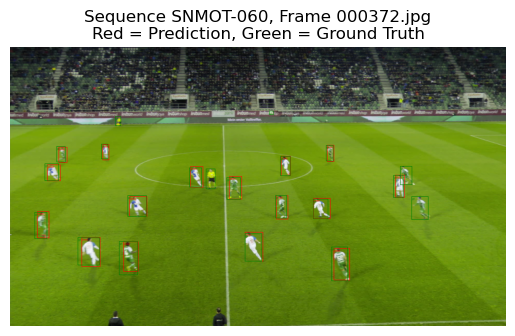

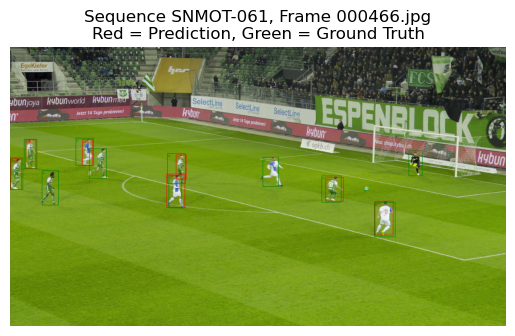

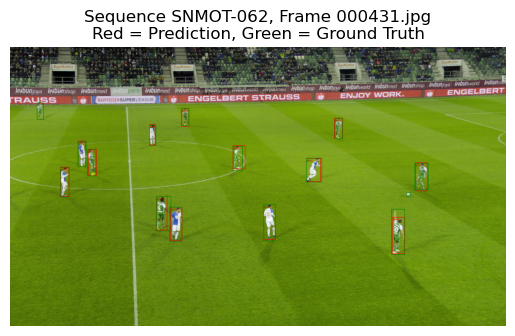

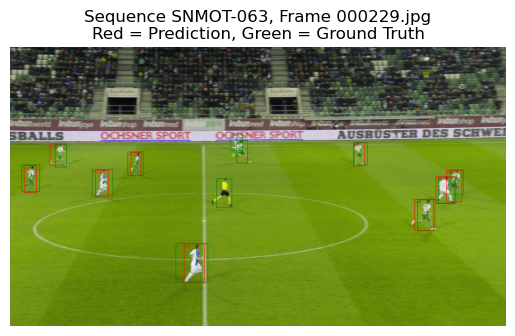

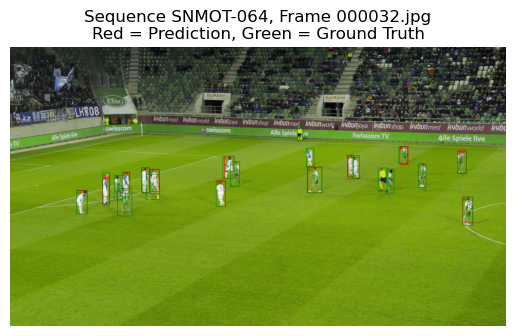

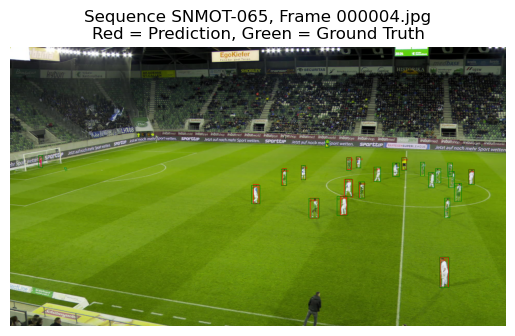

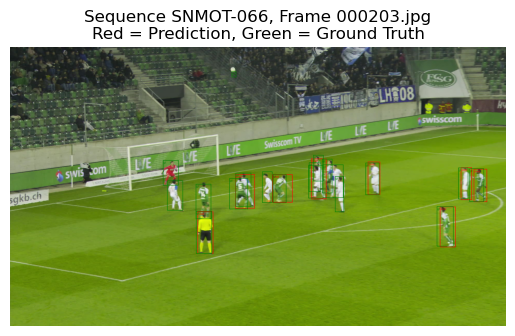

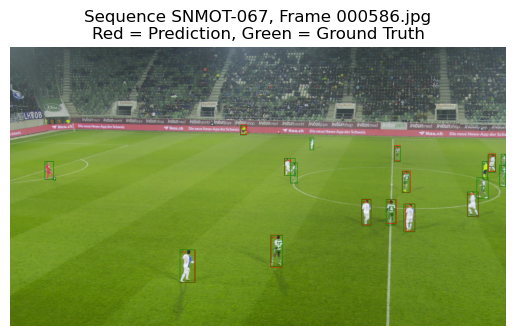

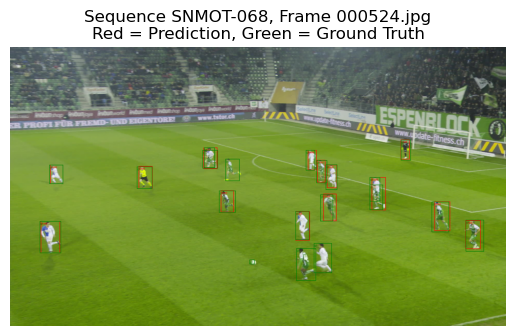

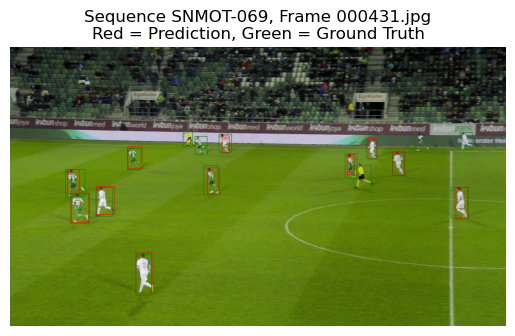

In [2]:


# --- LOAD MODEL ---
model = YOLO("discovery-runs/detect/ft-25epoch/weights/best.pt").to(DEVICE)
# model.half().to(DEVICE)
# model.to(DEVICE)

transform = T.ToTensor()

def load_gt_boxes(gt_path):
    gt_dict = defaultdict(list)
    if not os.path.exists(gt_path):
        return gt_dict
    with open(gt_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            frame, _, x, y, w, h, cls, _, _ = map(int, parts[:9])
            gt_dict[frame].append(torch.tensor([x, y, x + w, y + h], device=DEVICE))
    return gt_dict

def compute_iou(box1, box2):
    if box1.size(0) == 0 or box2.size(0) == 0:
        return torch.zeros((box1.size(0), box2.size(0)), device=box1.device)
    area1 = (box1[:, 2] - box1[:, 0]) * (box1[:, 3] - box1[:, 1])
    area2 = (box2[:, 2] - box2[:, 0]) * (box2[:, 3] - box2[:, 1])
    lt = torch.max(box1[:, None, :2], box2[:, :2])
    rb = torch.min(box1[:, None, 2:], box2[:, 2:])
    wh = (rb - lt).clamp(min=0)
    inter = wh[:, :, 0] * wh[:, :, 1]
    union = area1[:, None] + area2 - inter
    iou = inter / union
    return iou

def plot_gt_and_detections(image_tensor, detections, gt_boxes):
    from torchvision.utils import draw_bounding_boxes
    all_boxes = []
    labels = []
    colors = []

    for box in detections:
        all_boxes.append(box)
        labels.append("pred")
        colors.append("red")

    for box in gt_boxes:
        all_boxes.append(box)
        labels.append("gt")
        colors.append("green")

    if not all_boxes:
        return T.ToPILImage()(image_tensor)
    
    boxes_tensor = torch.stack(all_boxes).cpu()

    
    x1 = torch.min(boxes_tensor[:, 0], boxes_tensor[:, 2])
    y1 = torch.min(boxes_tensor[:, 1], boxes_tensor[:, 3])
    x2 = torch.max(boxes_tensor[:, 0], boxes_tensor[:, 2])
    y2 = torch.max(boxes_tensor[:, 1], boxes_tensor[:, 3])
    boxes_tensor = torch.stack([x1, y1, x2, y2], dim=1).to(torch.int)
    img_uint8 = (image_tensor * 255).byte().cpu()
    drawn = draw_bounding_boxes(img_uint8, boxes_tensor, labels=labels, colors=colors, width=2)
    return T.ToPILImage()(drawn)

# --- EXECUTION ---
results = []
sample_frames = []
total_tp = total_fp = total_fn = 0

seq_dirs = []
for split in ["train", "test"]:
    split_dir = os.path.join(BASE_DATA_ROOT, split)
    if not os.path.exists(split_dir):
        continue
    for d in sorted(os.listdir(split_dir)):
        full_path = os.path.join(split_dir, d)
        if os.path.isdir(full_path):
            seq_dirs.append((split, d))

print("Using device:", DEVICE)
print("Processing sequences...")

for split, seq_id in tqdm(seq_dirs, desc="Sequences", dynamic_ncols=True):
    seq_path = os.path.join(BASE_DATA_ROOT, split, seq_id)
    img_dir = os.path.join(seq_path, IMAGE_FOLDER)
    gt_path = os.path.join(seq_path, "gt", GT_FILENAME)
    gt_dict = load_gt_boxes(gt_path)

    if not os.path.exists(img_dir):
        continue

    all_img_paths = sorted([
        os.path.join(img_dir, file)
        for file in os.listdir(img_dir)
        if any(file.lower().endswith(ext) for ext in IMAGE_EXTS)
    ])

    random.shuffle(all_img_paths)
    all_img_paths = all_img_paths[:SAMPLE_PER_SEQ]

    for path in all_img_paths:
        try:
            img = Image.open(path).convert("RGB")
        except:
            continue

        img_tensor = transform(img).unsqueeze(0)
        img_tensor = img_tensor.half()
        img_tensor = img_tensor.squeeze(0) 

        img_tensor = img_tensor.to(DEVICE)



        filename = os.path.basename(path)
        try:
            frame_id = int(filename.split('.')[0])
        except:
            continue

        gt_boxes = gt_dict.get(frame_id, [])

        with torch.no_grad():
            yolo_result = model(img)[0]  # Get first result
            preds = yolo_result.boxes.data.to(DEVICE) if yolo_result.boxes is not None else torch.empty((0, 6)).to(DEVICE)

        pred_boxes = preds[:, :4][preds[:, 4] > SCORE_THRESH] if len(preds) else torch.empty((0, 4), device=DEVICE)

        # Accuracy
        if gt_boxes:
            gt_tensor = torch.stack(gt_boxes).to(DEVICE)
            if len(pred_boxes) > 0:
                ious = compute_iou(pred_boxes, gt_tensor)
                max_ious = ious.max(dim=1)[0]
                acc = (max_ious > IOU_THRESH).float().mean().item()
            else:
                acc = 0.0
        else:
            acc = 1.0 if len(pred_boxes) == 0 else 0.0

        results.append(acc)

        # Precision/Recall
        matched_gt = set()
        tp = fp = 0
        if len(pred_boxes) > 0 and len(gt_boxes) > 0:
            ious = compute_iou(pred_boxes, gt_tensor)
            for i in range(len(pred_boxes)):
                max_iou, gt_idx = ious[i].max(0)
                if max_iou > IOU_THRESH and gt_idx.item() not in matched_gt:
                    tp += 1
                    matched_gt.add(gt_idx.item())
                else:
                    fp += 1
        else:
            tp = 0
            fp = len(pred_boxes)

        fn = len(gt_boxes) - len(matched_gt)
        total_tp += tp
        total_fp += fp
        total_fn += fn

        if len(sample_frames) < NUM_VISUALS and seq_id not in [s[0] for s in sample_frames]:
            img_vis = plot_gt_and_detections(img_tensor, pred_boxes, gt_boxes)
            sample_frames.append((seq_id, filename, img_vis))
            

# --- METRICS ---
precision = total_tp / (total_tp + total_fp + 1e-6)
recall = total_tp / (total_tp + total_fn + 1e-6)
avg_acc = sum(results) / len(results) if results else 0
print(f"\nAverage Detection Accuracy over {len(results)} frames: {avg_acc * 100:.2f}%")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")

# --- SHOW EXAMPLES ---
for seq_id, filename, img in sample_frames:
    plt.imshow(img)
    plt.title(f"Sequence {seq_id}, Frame {filename}\nRed = Prediction, Green = Ground Truth")
    plt.axis("off")
    plt.show()
